In [1]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

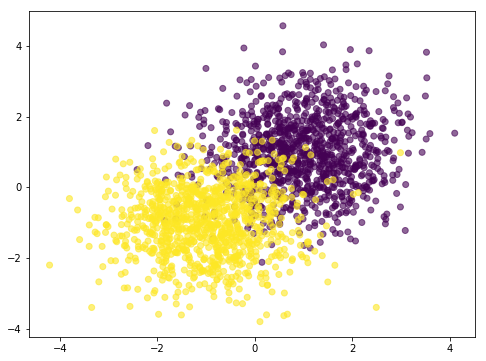

In [2]:
# Simulate Data

D = 2
K = 2
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([1,1])
X1 = np.random.randn((N//K),D) + np.array([-1,-1])
X = np.vstack((X0, X1))

y = np.array([0]*(N//K) + [1]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)

In [3]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [4]:
# Data Prep

X = np.hstack((np.ones((N,1)), X))

X[:10,:]

array([[ 1.        ,  1.42191741,  0.28731712],
       [ 1.        ,  0.59766571,  1.15297707],
       [ 1.        ,  0.12104323, -0.54026756],
       [ 1.        ,  1.63746006, -0.52180873],
       [ 1.        ,  0.2552586 ,  2.31907002],
       [ 1.        ,  2.27015934,  0.92247692],
       [ 1.        ,  0.09988599, -0.54112935],
       [ 1.        ,  1.7609612 ,  0.69876638],
       [ 1.        ,  1.38947838,  1.03607267],
       [ 1.        ,  0.54626898,  1.32347612]])

In [21]:
# Functions
# binomial only
def sigmoid(h):
    return 1 / (1 + np.exp(-h))
#multinomial only
def softMax(h):
    return np.exp(h) / np.vstack((np.sum(np.exp(h), axis = 1)))

# binomial only
def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))
#multinomial only when  y has 2 coulum
def cross_entropy2(y, p):
    return  -np.sum(y*np.log(p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

In [11]:
D

2

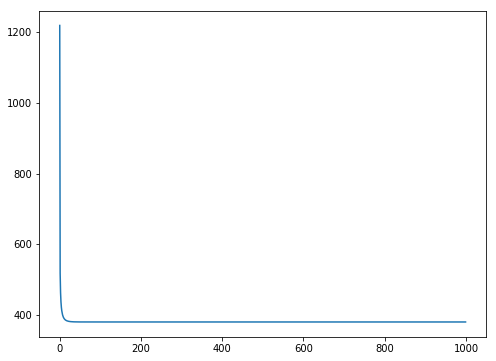

In [5]:
# Train the Model

w = np.random.randn(D+1)

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p = sigmoid(X.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*X.T.dot(p - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [6]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y, p)))

Accuracy: 0.926


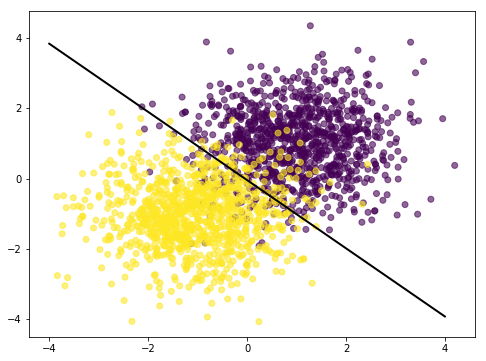

In [7]:
# Visualize the Decision Boundary (First way)

x1 = np.linspace(-4, 4, 10)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1

plt.figure(figsize = (8,6))
plt.scatter(X[:,1], X[:,2], c = y, alpha = 0.6)
plt.plot(x1, x2, color = "black", linewidth = 2)

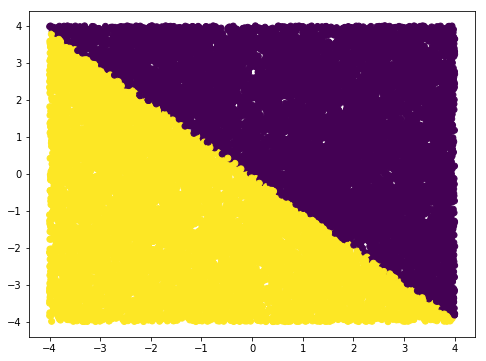

In [8]:
# Visualize the Decision Boundary (Second way)

X_vis = np.random.uniform(-4, 4, (int(10*N),D))
X_vis = np.hstack((np.ones((int(10*N),1)), X_vis))

X_vis[:10,:]

p_vis = sigmoid(X_vis.dot(w))

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,1], X_vis[:,2], c = np.round(p_vis))

In [101]:
# ROC / AUC

roc_matrix = np.column_stack((p,np.round(p), y))

roc_matrix = roc_matrix[roc_matrix[:,0].argsort()[::-1],:]
tp = np.cumsum((roc_matrix[:,1]==1) & (roc_matrix[:,2] ==1))/np.sum(roc_matrix[:,2] == 1)
fp = np.cumsum((roc_matrix[:,1]==1) & (roc_matrix[:,2] ==0))/np.sum(roc_matrix[:,2] == 0)

tp = np.array([0] + tp.tolist() + [1])
fp = np.array([0] + fp.tolist() + [1])

roc_matrix[:2,]

array([[0.99999825, 1.        , 1.        ],
       [0.99999768, 1.        , 1.        ]])

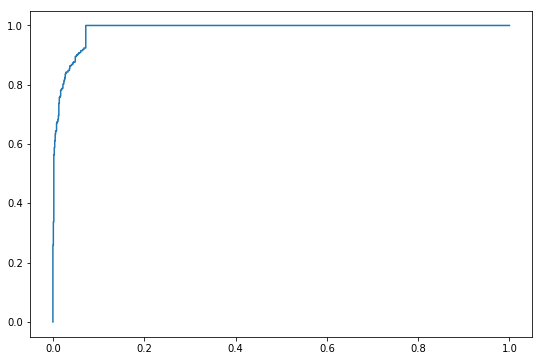

In [102]:
plt.figure(figsize= (9,6))
plt.step(fp,tp)

In [103]:
auc = tp[1:].dot(np.diff(fp))

auc

0.986518

In [104]:
auc2 = sum([h*w for h,w in zip(tp[1:], fp[1:] -fp[: -1])])

auc2

0.986518

C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


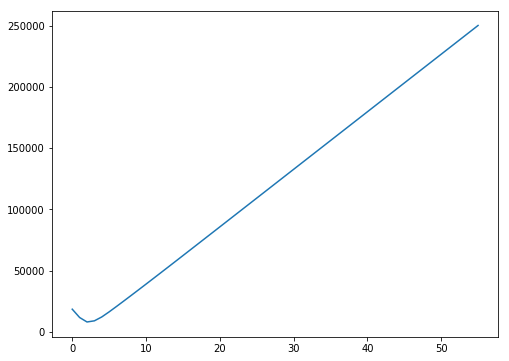

In [19]:
w = np.random.randn(D+1)

J = []
eta = 1e-3
epochs = int(1e4)

for t in range(epochs):
    p = softmax(X.dot(w))
    J.append(cross_entropy2(y, p))
    w -= eta*X.T.dot(p - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [20]:

print("Accuracy: {}".format(accuracy(y, p)))

Accuracy: 0.0


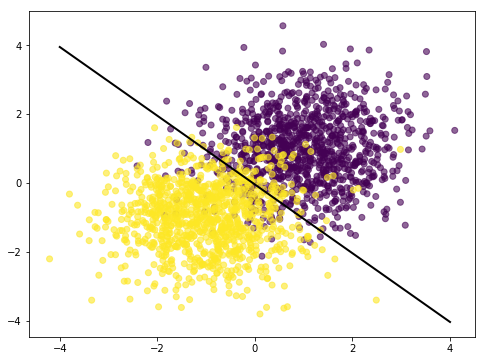

In [11]:
x1 = np.linspace(-4, 4, 10)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1

plt.figure(figsize = (8,6))
plt.scatter(X[:,1], X[:,2], c = y, alpha = 0.6)
plt.plot(x1, x2, color = "black", linewidth = 2)